In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as stat
from sklearn import svm
from sklearn import metrics
import statsmodels.api as sm
import utils
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold

In [3]:
from sklearn import preprocessing

In [4]:
df = pd.read_csv('data.csv')
len(df)
df = df.reset_index()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(1, inplace=True)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:>

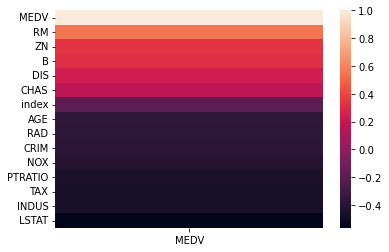

In [16]:
sn.heatmap(df.corr()[['MEDV']].sort_values(by='MEDV', ascending=False))

In [5]:
features = ['RM','ZN','B','DIS', 'CHAS']
X = df.loc[:, features]
y = df.loc[:, ['MEDV']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=973, test_size=0.2)

In [9]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 973)
for train_index, test_index in kf.split(X, y):

    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]

In [19]:
len(X_train)

408

In [6]:
len(X_test)

103

In [27]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [16]:
lab_enc = preprocessing.LabelEncoder()
y_test_enc = lab_enc.fit_transform(y_test)

C:\Users\jessi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 973)
for train_index, test_index in kf.split(X, y):
     
    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]

In [18]:
label_encoder = preprocessing.LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train.values.ravel())
lab_enc = preprocessing.LabelEncoder()
y_test_enc = lab_enc.fit_transform(y_test.values.ravel())

In [19]:
svmmodel = svm.SVC(kernel='linear')
svmmodel.fit(X_train, y_train_enc)
Ypredictsvm=svmmodel.predict(X_test)
#accuracy=metrics.accuracy_score(y_test, Ypredictsvm)
#print("svm error:", 1-accuracy)
#print(Ypredictsvm)


In [14]:
r2_score(y_test, Ypredictsvm) #K Fold

-100.95467179163798

In [20]:
r2_score(y_test, Ypredictsvm) #Train Test Split

-88.36727612351142

In [18]:
y_test

,MEDV
65,23.5
41,26.6
327,22.2
71,21.7
490,8.1
...,...
449,13.0
263,31.0
386,10.5
450,13.4


In [19]:
len(Ypredictsvm)

103

In [12]:
svmmodel.score(y_test, Ypredictsvm)

ValueError: X.shape[1] = 1 should be equal to 5, the number of features at training time